In [1]:
!which python
import sys

print(sys.version)


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/bin/python


3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import wordnet
import seaborn as sns
import matplotlib.pyplot as plt
# import spacy
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))



from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth',1000)

# nlp = spacy.load("en_core_web_sm")
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt') 
# nltk.download('stopwords')

In [3]:
df = pd.read_json('final_cases_corrected.json')

In [4]:
df.head()

,respondent,description,url,order_type,date,overview,violations,relief,impacts,benefits,...,"mercury refining, inc. superfund site",companies,agreement,on this page:,violation,tsca/rcra settlement,tsca/rcra settlement supplemental environmental projects (seps),fluorotelomer-based product biodegradation testing sep,microscale chemistry and green chemistry sep,sdwa settlements:
0,2023 Tesoro Martinez Clean Air Act Settlement Information Sheet,"(Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. Department of Justice announced that Tesoro Refining & Marketing Company has agreed to pay a $27.5 million penalty and comply with requirements to limit air pollution from Tesoro’s petroleum refinery in Martinez, California. Overview\n\tViolations\n\tInjunctive Relief\n\tPollutant Reductions\n\tHealth and Environmental Effects\n\tCivil Penalty\n\tComment Period\n\tContact",https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet,Consent Decree,2023-04-27,"Overview of Company Tesoro Refining & Marketing Company (Tesoro) is the owner and operator of the Martinez Refinery, located about 30 miles northeast of San Francisco. In October 2018, about three months after the alleged violation began, Marathon Petroleum Corporation acquired Tesoro’s parent corporation, resulting in Tesoro becoming an indirect subsidiary of Marathon. Tesoro suspended operations at the Martinez Refinery in May 2020 and announced its plan to convert the refinery from producing fuels from crude oil to fuels from renewable sources such as vegetable oils. In May 2022, Contra Costa County approved the renewable fuels project, and, in September 2022, Bay Area Air Quality Management District issued a construction permit for the project. Prior to idling in May 2020, the Martinez Refinery had a refining capacity of approximately 161,000 barrels per day and was the fourth largest petroleum refinery in California. Tesoro expects it will begin production of renewable fuels ...","Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requirement at the Martinez Refinery related to Tesoro’s compliance with a 2016 consent decree. Specifically, from July 1, 2018, through about May 1, 2020 (when Tesoro suspended refinery operations), Tesoro failed to comply with a 20 parts per million nitrogen oxide (NOx) emission limit at the Martinez Refinery fluid catalytic cracking unit (FCCU). FCCUs are major sources of air pollution at petroleum refineries.","Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree Modification) and has two sets of injunctive relief requirements depending on Tesoro’s choice to convert the refinery to a renewable fuels plant or restart petroleum refining. The Consent Decree Modification provides Tesoro with the flexibility to choose the future operations at the Martinez Refinery, so long as such operations adhere to the requirements of the Consent Decree Modification. The Consent Decree Modification also includes various on-site projects to mitigate the pollution resulting from the alleged violation. If Tesoro Converts the Martinez Refinery to a Renewable Fuels Plant NOx and sulfur dioxide (SO2) emission reduction requirements for heaters and boilers\n\tRequirements for control of flaring events\n\tRequirements for leak detection and repair\n\tPermanent shutdown of many petroleum refinery emission units\n\tPartial demolition of the FCCU and No. 6 Boiler to render the...",,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet","(Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of Griffith, Indiana, have agreed to construction projects and capital investments that will eliminate discharges of untreated sewage from their sewer systems into nearby water bodies, including the Little Calumet River. Overvie

In [5]:
df.tail()

,respondent,description,url,order_type,date,overview,violations,relief,impacts,benefits,...,"mercury refining, inc. superfund site",companies,agreement,on this page:,violation,tsca/rcra settlement,tsca/rcra settlement supplemental environmental projects (seps),fluorotelomer-based product biodegradation testing sep,microscale chemistry and green chemistry sep,sdwa settlements:
762,"Renault Vehicules Industriels, s.a. Diesel Engines Settlement","On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced an $83.4 million total penalty against diesel manufacturers, the largest civil penalty ever for violation of environmental law. Under this settlement, seven major manufacturers of diesel engines will spend more than one billion dollars to resolve claims that they installed computer devices in heavy duty diesel engines which resulted in illegal amounts of air pollution emissions. This settlement will prevent 75 million tons of harmful nitrogen oxide (NOx) emissions nationwide by the year 2025. The companies involved are Caterpillar, Inc., Cummins Engine Company, Detroit Diesel Corporation, Mack Trucks, Inc., Navistar International Transportation Corporation, Renault Vehicules Industriels, s.a., and Volvo Truck Corporation.",https://www.epa.gov/enforcement/renault-vehicules-industriels-sa-diesel-engines-settlement,Consent Decree,1998-10-22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,Volvo Truck Corporation (Order and Consent Decree) Diesel Engine Settlement,"On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced an $83.4 million total penalty against diesel manufacturers, the largest civil penalty ever for violation of environmental law. Under this settlement, seven major manufacturers of diesel engines will spend more than one billion dollars to resolve claims that they installed computer devices in heavy duty diesel engines which resulted in illegal amounts of air pollution emissions. This settlement will prevent 75 million tons of harmful nitrogen oxide (NOx) emissions nationwide by the year 2025. The companies involved are Caterpillar, Inc., Cummins Engine Company, Detroit Diesel Corporation, Mack Trucks, Inc., Navistar International Transportation Corporation, Renault Vehicules Industriels, s.a., and Volvo Truck Corporation.",https://www.epa.gov/enforcement/volvo-truck-corporation-diesel-engines-settlement,Consent Decree,1998-10-22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,"FMC Corporation, Inc. Hazardous Waste Settlement","On October 16, 1998, settlement was reached with FMC Corporation, Inc. for numerous RCRA hazardous waste violations at its phosphorus production facility in Pocatello, Idaho. In the settlement, FMC has agreed to spend a total of approximately $170 million -- including the largest civil penalty ever obtained to date under the Resource Conservation and Recovery Act (RCRA) of $11,864,800.\r\n\r\nThe most serious of violations involve mismanagement of ignitable and reactive phosphorus wastes in ponds. Storage of such hazardous wastes in ponds is prohibited by RCRA because of the potential threat to human health and the environment. The sediments in these ponds burn vigorously and persistently when exposed to the air, and a number of fires have been documented at these ponds in the past. The wastes in these ponds also generate phosphate and hydrogen cyanide, highly toxic gases that can cause serious health and environmental problems. FMC at times has reported elevated levels of phosphin...",https://www.epa.gov/enforcement/fmc-corporation-inc-hazardous-waste-settlement,Consent Decree,1998-10-16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,American Honda Settlement,"American Honda Motor Co., Inc. (""Honda"") will spend $267 million to settle allegations that it violated the Clean Air Act by selling vehicles with disabled emission control diagnostic systems, the Ju

In [6]:
df.columns

Index(['respondent', 'description', 'url', 'order_type', 'date', 'overview',
       'violations', 'relief', 'impacts', 'benefits',
       ...
       'mercury refining, inc. superfund site', 'companies', 'agreement',
       'on this page:', 'violation', 'tsca/rcra settlement',
       'tsca/rcra settlement supplemental environmental projects (seps)',
       'fluorotelomer-based product biodegradation testing sep',
       'microscale chemistry and green chemistry sep', 'sdwa settlements:'],
      dtype='object', length=135)

## missing values

In [7]:

df.isnull().mean()

respondent                                                         0.000000
description                                                        0.000000
url                                                                0.000000
order_type                                                         0.000000
date                                                               0.000000
                                                                     ...   
tsca/rcra settlement                                               0.998696
tsca/rcra settlement supplemental environmental projects (seps)    0.998696
fluorotelomer-based product biodegradation testing sep             0.998696
microscale chemistry and green chemistry sep                       0.998696
sdwa settlements:                                                  0.998696
Length: 135, dtype: float64

In [8]:
# df = df.fillna("")

In [9]:
# manually grouped columns
grouped_columns = {
    'parties': ['respondent', 'defendants'],
    'description': ['description', 'overview', 'summary', 'background'],
    'site': ['url', 'site'],
    'contact': ['contacts', 'contact', 'contact information'],
    'order_type': ['order_type'],
    'order': ['order', 'consentdecree', 'determination', 'decree', 'administrative'],
    'date': ['date', 'period'],
    'violations': ['violations', 'complaints', 'violation'],
    'relief': ['relief', 'injunctive', 'refinery-specific injunctive relief'],
    'impacts': ['impacts', 'healtheffects', 'health', 'effects',
                'climate', 'health and environmental benefits'],
    'benefits': ['benefits', 'mitigation', 'mitigation projects', 'enhanced leak detection and repair (eldar) program (all six refineries)', 'infrared gas-imaging camera project', 'school bus replacement project',
                 'salt lake city ultraformer furnace project', 'investment', 'cost', 'emission', 'information about the gorst creek bremerton auto wrecking landfill (gcl) site', 'kodak'],
    'penalty': ['civil', 'civil penalty', 'penalty', 'actions $30,000 or more', 'actions $20,000 or more', 'actions $10,000 or more', 'actions less than $10,000', 'settlement', 'settlements of $100,000 or more', 'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000', 'bank', 'settlement', 'settlements of $100,000 or more',
                'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000', 'settlement', 'settlements of $100,000 or more', 'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000']
}


df_copy = df.copy()
built_df = pd.DataFrame()


def build_df(grouped_columns, df):
    for key in grouped_columns.keys():
        print(f"Merging columns for key '{key}'")
        merge_columns = []
        for col in grouped_columns[key]:
            if df[col].dtype == 'object':
                merge_columns.append(col)
            else:
                print(
                    f"Skipping merging for column '{col}' as it is not of string type.")
        if merge_columns:
            built_df[key] = df[merge_columns].fillna(" ").apply(
                lambda x: ' '.join(x.astype(str)), axis=1)


build_df(grouped_columns, df)
df = built_df.copy()

Merging columns for key 'parties'
Merging columns for key 'description'
Merging columns for key 'site'
Merging columns for key 'contact'
Merging columns for key 'order_type'
Merging columns for key 'order'
Merging columns for key 'date'
Skipping merging for column 'date' as it is not of string type.
Merging columns for key 'violations'
Merging columns for key 'relief'
Merging columns for key 'impacts'
Merging columns for key 'benefits'
Merging columns for key 'penalty'


In [10]:
df.head()

,parties,description,site,contact,order_type,order,date,violations,relief,impacts,benefits,penalty
0,2023 Tesoro Martinez Clean Air Act Settlement Information Sheet,"(Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. Department of Justice announced that Tesoro Refining & Marketing Company has agreed to pay a $27.5 million penalty and comply with requirements to limit air pollution from Tesoro’s petroleum refinery in Martinez, California. Overview\n\tViolations\n\tInjunctive Relief\n\tPollutant Reductions\n\tHealth and Environmental Effects\n\tCivil Penalty\n\tComment Period\n\tContact Overview of Company Tesoro Refining & Marketing Company (Tesoro) is the owner and operator of the Martinez Refinery, located about 30 miles northeast of San Francisco. In October 2018, about three months after the alleged violation began, Marathon Petroleum Corporation acquired Tesoro’s parent corporation, resulting in Tesoro becoming an indirect subsidiary of Marathon. Tesoro suspended operations at the Martinez Refinery in May 2020 and announced its plan to convert the refinery from producing fuels from crude oil to f...",https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet,"Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Protection Agency (2242A)\n1200 Pennsylvania Ave., N.W.\nWashington, DC 20460-0001\n(202) 564-7978foley.patrick@epa.gov",Consent Decree,,,"Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requirement at the Martinez Refinery related to Tesoro’s compliance with a 2016 consent decree. Specifically, from July 1, 2018, through about May 1, 2020 (when Tesoro suspended refinery operations), Tesoro failed to comply with a 20 parts per million nitrogen oxide (NOx) emission limit at the Martinez Refinery fluid catalytic cracking unit (FCCU). FCCUs are major sources of air pollution at petroleum refineries.","Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree Modification) and has two sets of injunctive relief requirements depending on Tesoro’s choice to convert the refinery to a renewable fuels plant or restart petroleum refining. The Consent Decree Modification provides Tesoro with the flexibility to choose the future operations at the Martinez Refinery, so long as such operations adhere to the requirements of the Consent Decree Modification. The Consent Decree Modification also includes various on-site projects to mitigate the pollution resulting from the alleged violation. If Tesoro Converts the Martinez Refinery to a Renewable Fuels Plant NOx and sulfur dioxide (SO2) emission reduction requirements for heaters and boilers\n\tRequirements for control of flaring events\n\tRequirements for leak detection and repair\n\tPermanent shutdown of many petroleum refinery emission units\n\tPartial demolition of the FCCU and No. 6 Boiler to render the...","Health and Environmental Effects Nitrogen Oxides (NOx) – NOx can cause ground-level ozone, acid rain, particulate matter, global warming, water quality deterioration, and visual impairment. NOx plays a major role, with volatile organic chemicals, in the atmospheric reactions that produce ozone. Children, people with lung diseases such as asthma, and people who work or exercise outside are susceptible to adverse effects such as damage to lung tissue and reduction in lung function.\n\tSulfur Dioxide (SO2) – High concentrations of SO2 affect breathing and may aggravate existing respiratory and cardiovascular disease. Sensitive populations include asthmatics, individuals with bronchitis or emphysema, children, and the elderly. SO2 is also a primary contributor to acid deposition, or acid rain.\n\tVolatile Organic Compounds (VOCs) – VOCs, along with NOx, play a major role in the atmospheric reactions that produce ozone, which is the primary constituent of smog. People with lung dis...",,"Civil P

In [11]:
df.tail()

,parties,description,site,contact,order_type,order,date,violations,relief,impacts,benefits,penalty
762,"Renault Vehicules Industriels, s.a. Diesel Engines Settlement","On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced an $83.4 million total penalty against diesel manufacturers, the largest civil penalty ever for violation of environmental law. Under this settlement, seven major manufacturers of diesel engines will spend more than one billion dollars to resolve claims that they installed computer devices in heavy duty diesel engines which resulted in illegal amounts of air pollution emissions. This settlement will prevent 75 million tons of harmful nitrogen oxide (NOx) emissions nationwide by the year 2025. The companies involved are Caterpillar, Inc., Cummins Engine Company, Detroit Diesel Corporation, Mack Trucks, Inc., Navistar International Transportation Corporation, Renault Vehicules Industriels, s.a., and Volvo Truck Corporation.",https://www.epa.gov/enforcement/renault-vehicules-industriels-sa-diesel-engines-settlement,,Consent Decree,,,,,,,
763,Volvo Truck Corporation (Order and Consent Decree) Diesel Engine Settlement,"On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced an $83.4 million total penalty against diesel manufacturers, the largest civil penalty ever for violation of environmental law. Under this settlement, seven major manufacturers of diesel engines will spend more than one billion dollars to resolve claims that they installed computer devices in heavy duty diesel engines which resulted in illegal amounts of air pollution emissions. This settlement will prevent 75 million tons of harmful nitrogen oxide (NOx) emissions nationwide by the year 2025. The companies involved are Caterpillar, Inc., Cummins Engine Company, Detroit Diesel Corporation, Mack Trucks, Inc., Navistar International Transportation Corporation, Renault Vehicules Industriels, s.a., and Volvo Truck Corporation.",https://www.epa.gov/enforcement/volvo-truck-corporation-diesel-engines-settlement,,Consent Decree,,,,,,,
764,"FMC Corporation, Inc. Hazardous Waste Settlement","On October 16, 1998, settlement was reached with FMC Corporation, Inc. for numerous RCRA hazardous waste violations at its phosphorus production facility in Pocatello, Idaho. In the settlement, FMC has agreed to spend a total of approximately $170 million -- including the largest civil penalty ever obtained to date under the Resource Conservation and Recovery Act (RCRA) of $11,864,800.\r\n\r\nThe most serious of violations involve mismanagement of ignitable and reactive phosphorus wastes in ponds. Storage of such hazardous wastes in ponds is prohibited by RCRA because of the potential threat to human health and the environment. The sediments in these ponds burn vigorously and persistently when exposed to the air, and a number of fires have been documented at these ponds in the past. The wastes in these ponds also generate phosphate and hydrogen cyanide, highly toxic gases that can cause serious health and environmental problems. FMC at times has reported elevated levels of phosphin...",https://www.epa.gov/enforcement/fmc-corporation-inc-hazardous-waste-settlement,,Consent Decree,,,,,,,
765,American Honda Settlement,"American Honda Motor Co., Inc. (""Honda"") will spend $267 million to settle allegations that it violated the Clean Air Act by selling vehicles with disabled emission control diagnostic systems, the Justice Department, the Environmental Protection Agency, and the California Air Resources Board (""CARB"") announced today. The settlement is the largest ever under the Clean Air Act. It includes $12.6 million in civil penalties the largest civil penalty in Clean Air Act history.",https://www.epa.gov/enforcement/american-honda-motor-company-clean-air-act-settlement,,Consent Decree,,,,,,,
766,Ford Motor Company Settlement,"EPA filed a settlement with Ford Motor Company, in the U.

In [12]:
df.columns

Index(['parties', 'description', 'site', 'contact', 'order_type', 'order',
       'date', 'violations', 'relief', 'impacts', 'benefits', 'penalty'],
      dtype='object')

In [13]:
## removing trailing space
df = df.applymap(lambda x:x.strip())

In [14]:
## looking at first 5 records of each column to see if how the data is after merge
for col in df.columns:
    display(print(f"{col}:\n\n{df.loc[:5,col]}\n\n"))

parties:

0                        2023 Tesoro Martinez Clean Air Act Settlement Information Sheet
1    Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet
2                 Town of Griffith, Indiana Clean Water Act Settlement Information Sheet
3                                2023 MPLX LP Clean Air Act Settlement Information Sheet
4           2023 The Williams Companies, Inc. Clean Air Act Settlement Information Sheet
5                        WES DJ Gathering LLC Clean Air Act Settlement Information Sheet
Name: parties, dtype: object




None

description:

0    (Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. Department of Justice announced that Tesoro Refining & Marketing Company has agreed to pay a $27.5 million penalty and comply with requirements to limit air pollution from Tesoro’s petroleum refinery in Martinez, California. Overview\n\tViolations\n\tInjunctive Relief\n\tPollutant Reductions\n\tHealth and Environmental Effects\n\tCivil Penalty\n\tComment Period\n\tContact  Overview of Company Tesoro Refining & Marketing Company (Tesoro) is the owner and operator of the Martinez Refinery, located about 30 miles northeast of San Francisco. In October 2018, about three months after the alleged violation began, Marathon Petroleum Corporation acquired Tesoro’s parent corporation, resulting in Tesoro becoming an indirect subsidiary of Marathon. Tesoro suspended operations at the Martinez Refinery in May 2020 and announced its plan to convert the refinery from producing fuels from 

None

site:

0                    https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet
1    https://www.epa.gov/enforcement/sanitary-district-highland-indiana-clean-water-act-settlement-information-sheet
2                 https://www.epa.gov/enforcement/town-griffith-indiana-clean-water-act-settlement-information-sheet
3                            https://www.epa.gov/enforcement/2023-mplx-lp-clean-air-act-settlement-information-sheet
4             https://www.epa.gov/enforcement/2023-williams-companies-inc-clean-air-act-settlement-information-sheet
5                    https://www.epa.gov/enforcement/wes-dj-gathering-llc-clean-air-act-settlement-information-sheet
Name: site, dtype: object




None

contact:

0                                                                                                                                                                                                                                                                                                                     Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Protection Agency (2242A)\n1200 Pennsylvania Ave., N.W.\nWashington, DC 20460-0001\n(202) 564-7978foley.patrick@epa.gov
1                                                                                                                                                                                                                                                                                                                          Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.andre@epa.gov Keith MiddletonEnforcement and Compliance Assurance D

None

order_type:

0    Consent Decree
1                  
2                  
3    Consent Decree
4    Consent Decree
5    Consent Decree
Name: order_type, dtype: object




None

order:

0    
1    
2    
3    
4    
5    
Name: order, dtype: object




None

date:

0    
1    
2    
3    
4    
5    
Name: date, dtype: object




None

violations:

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requirement at the Martinez Refinery related to Tesoro’s compliance with a 2016 consent decree. Specifically, from July 1, 2018, through about May 1, 2020 (when Tesoro suspended refinery operations), Tesoro failed to comply with a 20 parts per million nitrogen oxide (NOx) emission limit at the Martinez Refinery fluid catalytic cracking unit (FCCU). FCCUs are major sources of air pollution at petr

None

relief:

0    Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree Modification) and has two sets of injunctive relief requirements depending on Tesoro’s choice to convert the refinery to a renewable fuels plant or restart petroleum refining. The Consent Decree Modification provides Tesoro with the flexibility to choose the future operations at the Martinez Refinery, so long as such operations adhere to the requirements of the Consent Decree Modification. The Consent Decree Modification also includes various on-site projects to mitigate the pollution resulting from the alleged violation. If Tesoro Converts the Martinez Refinery to a Renewable Fuels Plant NOx and sulfur dioxide (SO2) emission reduction requirements for heaters and boilers\n\tRequirements for control of flaring events\n\tRequirements for leak detection and repair\n\tPermanent shutdown of many petroleum refinery emission units\n\tPartial demolition of the FCCU and No. 6 Boiler to r

None

impacts:

0    Health and Environmental Effects Nitrogen Oxides (NOx) – NOx can cause ground-level ozone, acid rain, particulate matter, global warming, water quality deterioration, and visual impairment. NOx plays a major role, with volatile organic chemicals, in the atmospheric reactions that produce ozone. Children, people with lung diseases such as asthma, and people who work or exercise outside are susceptible to adverse effects such as damage to lung tissue and reduction in lung function.\n\tSulfur Dioxide (SO2) – High concentrations of SO2 affect breathing and may aggravate existing respiratory and cardiovascular disease. Sensitive populations include asthmatics, individuals with bronchitis or emphysema, children, and the elderly. SO2 is also a primary contributor to acid deposition, or acid rain.\n\tVolatile Organic Compounds (VOCs) – VOCs, along with NOx, play a major role in the atmospheric reactions that produce ozone, which is the primary constituent of smog. People with lu

None

benefits:

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

None

penalty:

0                                                                                                                                                                                                                                                                              Civil Penalty Tesoro will pay a $27.5 million civil penalty, plus interest accruing from November 1, 2020.
1                                                                                                                                                                                                                                                                                                  Civil Penalty The proposed decree requires Williams to pay a $3,750,000 civil penalty.
2    Civil Penalty In addition to these compliance costs, their CDs also require Highland to pay a civil penalty of $175,000, and Griffith $16,500, split evenly between the United States and the State of Indiana. The penalty amounts t

None

## Missing Values

## Observation 
- for missing values we have look for empty records instead of using the traditional isnull() method.

In [15]:
def set_lables(title=None,xlabel=None,ylabel=None):
    plt.figure(figsize=(8,7))
    plt.title(title,fontdict={'fontsize':15,"fontweight":'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

parties: 2.6666666666666665
description: 0.3333333333333333
site: 2.6666666666666665
contact: 48.083333333333336
order_type: 5.583333333333333
order: 63.333333333333336
date: 63.333333333333336
violations: 52.833333333333336
relief: 54.5
impacts: 55.166666666666664
benefits: 59.166666666666664
penalty: 53.0


<Axes: title={'center': 'Missing Values'}>

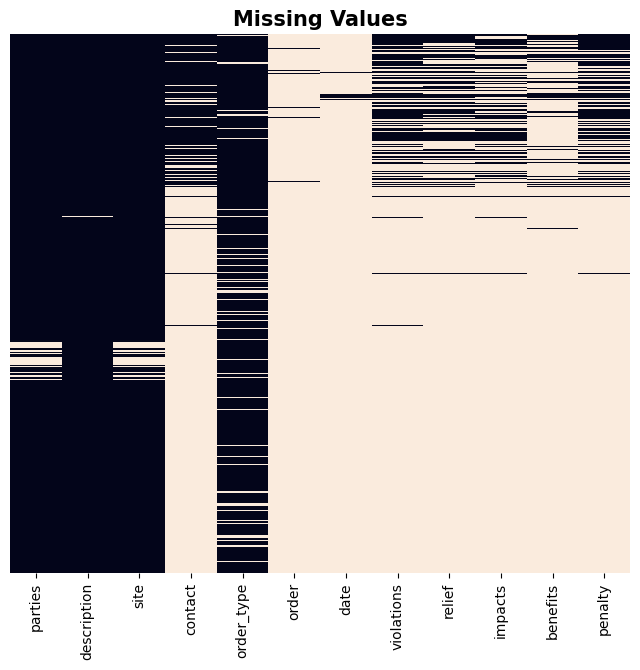

In [16]:
for col in df.columns:
    if df.query(f"{col}==''").bool:
        print(col,end=': ')
        print(len(df.query(f"{col}==''"))/df.shape[1])
## 
set_lables(title="Missing Values")
sns.heatmap(df.replace('',pd.NA).isnull(),yticklabels=False,cbar=False)

## Observation
- `date` and `order` has 63% missing values.

- `contact`, `violations`, `relief`, `impacts`, `benefits`, `penalty` has more than 50% values missing.

- And these make sense, as we know for each case all these may be applicable.

- We will have to look these columns in pairs to find any relations between them and see if some new features could be derived from them.

In [17]:
df

,parties,description,site,contact,order_type,order,date,violations,relief,impacts,benefits,penalty
0,2023 Tesoro Martinez Clean Air Act Settlement Information Sheet,"(Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. Department of Justice announced that Tesoro Refining & Marketing Company has agreed to pay a $27.5 million penalty and comply with requirements to limit air pollution from Tesoro’s petroleum refinery in Martinez, California. Overview\n\tViolations\n\tInjunctive Relief\n\tPollutant Reductions\n\tHealth and Environmental Effects\n\tCivil Penalty\n\tComment Period\n\tContact Overview of Company Tesoro Refining & Marketing Company (Tesoro) is the owner and operator of the Martinez Refinery, located about 30 miles northeast of San Francisco. In October 2018, about three months after the alleged violation began, Marathon Petroleum Corporation acquired Tesoro’s parent corporation, resulting in Tesoro becoming an indirect subsidiary of Marathon. Tesoro suspended operations at the Martinez Refinery in May 2020 and announced its plan to convert the refinery from producing fuels from crude oil to fu...",https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet,"Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Protection Agency (2242A)\n1200 Pennsylvania Ave., N.W.\nWashington, DC 20460-0001\n(202) 564-7978foley.patrick@epa.gov",Consent Decree,,,"Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requirement at the Martinez Refinery related to Tesoro’s compliance with a 2016 consent decree. Specifically, from July 1, 2018, through about May 1, 2020 (when Tesoro suspended refinery operations), Tesoro failed to comply with a 20 parts per million nitrogen oxide (NOx) emission limit at the Martinez Refinery fluid catalytic cracking unit (FCCU). FCCUs are major sources of air pollution at petroleum refineries.","Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree Modification) and has two sets of injunctive relief requirements depending on Tesoro’s choice to convert the refinery to a renewable fuels plant or restart petroleum refining. The Consent Decree Modification provides Tesoro with the flexibility to choose the future operations at the Martinez Refinery, so long as such operations adhere to the requirements of the Consent Decree Modification. The Consent Decree Modification also includes various on-site projects to mitigate the pollution resulting from the alleged violation. If Tesoro Converts the Martinez Refinery to a Renewable Fuels Plant NOx and sulfur dioxide (SO2) emission reduction requirements for heaters and boilers\n\tRequirements for control of flaring events\n\tRequirements for leak detection and repair\n\tPermanent shutdown of many petroleum refinery emission units\n\tPartial demolition of the FCCU and No. 6 Boiler to render them...","Health and Environmental Effects Nitrogen Oxides (NOx) – NOx can cause ground-level ozone, acid rain, particulate matter, global warming, water quality deterioration, and visual impairment. NOx plays a major role, with volatile organic chemicals, in the atmospheric reactions that produce ozone. Children, people with lung diseases such as asthma, and people who work or exercise outside are susceptible to adverse effects such as damage to lung tissue and reduction in lung function.\n\tSulfur Dioxide (SO2) – High concentrations of SO2 affect breathing and may aggravate existing respiratory and cardiovascular disease. Sensitive populations include asthmatics, individuals with bronchitis or emphysema, children, and the elderly. SO2 is also a primary contributor to acid deposition, or acid rain.\n\tVolatile Organic Compounds (VOCs) – VOCs, along with NOx, play a major role in the atmospheric reactions that produce ozone, which is the primary constituent of smog. People with lung disease,...",,"

In [18]:
df[['order','order_type']].query("order!=''")

,order,order_type
20,"Preliminary Injunction Order On March 18, 2021, the U.S. District Court for the District of Arizona granted the United States’ motion for a preliminary injunction against GBZ. The court enjoined GBZ from “(1) selling, offering for sale, or transferring any products or components listed in [an attachment to the Order], or any materially similar products; and (2) selling, offering for sale, or transferring any intellectual property associated with the products listed in [the attachment] to this Order, or any materially similar products.” In its opinion granting the request for a preliminary injunction, the court held: (1) that the United States was likely to prevail on the merits of the claims in its complaint that the manufacture and sale of the defeat devices violate Section 203(a)(3)(B) of the CAA, (2) that the continued selling of these defeat devices will result in irreparable harm, which the court called “obvious,” noting that such emissions of harmful pollutants damage human h...",Consent Decree
51,"Basis for the Order Beginning in March 2018, the EPA received tips and complaints of pesticides being distributed or sold on eBay.com in violation of FIFRA. Subsequently, the EPA began collecting and reviewing additional information on product sales, inspecting offers for sale of pesticides on eBay.com, and purchasing product samples from the website. Based on the information collected, the EPA has reason to believe that eBay has been distributing or selling, and intended to continue distributing or selling, over 40 pesticides that were unregistered, misbranded, or that were classified for restricted-use in violation of Sections 12(a)(1)(A), 12(a)(1)(E) and 12(a)(2)(F) of FIFRA, 7 U.S.C. §§ 136j(a)(1)(A), (a)(1)(E) and (a)(2)(F). Specifically, EPA documented FIFRA regulated pesticides that were not registered with the Agency, pesticides with unapproved claims for use against SARS-CoV-2, the virus that causes COVID-19, and/or coronavirus, and pesticides that were classified for rest...","Stop Sale, Use or Removal Order"
52,"Basis for the Order Beginning in December 2019, Region 10 reviewed information from tips and complaints and conducted its own investigation of pesticide products being distributed or sold on Amazon.com in violation of FIFRA. Based on the results of these efforts, the EPA has reason to believe Amazon had been distributing or selling, and intended to continue distributing and selling, unregistered pesticides and misbranded pesticides and devices in violation of Sections 12(a)(1)(A), 12(a)(1)(E) and 12(a)(1)(F) of FIFRA, 7 U.S.C. §§ 136j(a)(1)(A), (a)(1)(E) and (a)(1)(F). Specifically, the EPA documented Amazon was distributing or selling FIFRA regulated pesticides that were not registered with the Agency (including some with claims for use against SARS-CoV-2, the virus that causes COVID-19, and pesticides and devices with false or misleading claims on the product labeling.","Stop Sale, Use or Removal Order"
56,"Basis for the Order On or about January 16, 2020, EPA Region 4 discovered Electrolux had imported Frigidaire-brand dehumidifier products through the Port of Savannah that were claimed on the frigidaire.com website to provide an antimicrobial benefit and were claimed on the packaging to contain an “antibacterial filter.” No NOA had been filed for the products. From that date through the end of April 2020, several other EPA Regions discovered similar shipments at many different ports around the country of Electrolux dehumidifiers and air conditioner products with the same claims, through in-person inspections and by reviewing import filings and website claims. Upon review of the information gathered by the EPA Regions, and information submitted by Electrolux about its products, EPA was able to determine that the products being imported contained filters manufactured with nanosilver, which were intended to have a pesticidal effect on bacteria and improve air quality for the consumer. 


## Observation
- we will drop `date` and `site` column as will not contribute our analysis.

- `order` column has very few column but are important, we will moving forward to keep it or remove it.

In [19]:
df.drop(['date','site'],axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (767, 10)


## Type of orders

In [20]:
df['order_type'].value_counts()

order_type
Consent Decree                       514
                                      67
Administrative Order on Consent       36
Consent Agreement and Final Order     30
Settlement Agreement                  29
Unilateral Administrative Order       17
Stop Sale, Use or Removal Order       15
Import Refusal                        12
Consent Agreement                     10
Agreement                              7
Administrative Penalty Order           7
Administrative Agreement               6
Administrative Order                   5
Notice of Warning                      5
Complaint                              4
Amended Consent Decree                 3
Name: count, dtype: int64

In [21]:
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
def preprocess(record):

    ## removing special char
    record = re.sub(r'[^a-zA-Z\s]'," ",record)
    
    ## removing tab and new line char
    record = record.replace('\n', ' ').replace('\t', ' ')

    ## lowering text
    record = record.lower()

    ## sent tokenize

    record = sent_tokenize(record)


    

    return record



In [23]:
df = df.applymap(preprocess)

In [24]:
lemmatizer = WordNetLemmatizer()
for col in df.columns:
    for index,row in df.iterrows():
        df.at[index,col] = " ".join([lemmatizer.lemmatize(word) for word in row[col] if word not in stopwords.words('english')])

In [25]:
df

,parties,description,contact,order_type,order,violations,relief,impacts,benefits,penalty
0,tesoro martinez clean air act settlement information sheet,washington dc april the u s environmental protection agency epa and the u s department of justice announced that tesoro refining marketing company has agreed to pay a million penalty and comply with requirements to limit air pollution from tesoro s petroleum refinery in martinez california overview violations injunctive relief pollutant reductions health and environmental effects civil penalty comment period contact overview of company tesoro refining marketing company tesoro is the owner and operator of the martinez refinery located about miles northeast of san francisco in october about three months after the alleged violation began marathon petroleum corporation acquired tesoro s parent corporation resulting in tesoro becoming an indirect subsidiary of marathon tesoro suspended operations at the martinez refinery in may and announced its plan to convert the refinery from producing fuels from crude oil to fuels from renew...,contact information patrick w foley senior environmental engineer u s environmental protection agency a pennsylvania ave n w washington dc foley patrick epa gov,consent decree,,violations epa and the justice department allege that tesoro violated a clean air act requirement at the martinez refinery related to tesoro s compliance with a consent decree specifically from july through about may when tesoro suspended refinery operations tesoro failed to comply with a parts per million nitrogen oxide nox emission limit at the martinez refinery fluid catalytic cracking unit fccu fccus are major sources of air pollution at petroleum refineries,injunctive relief the settlement is a modification to the consent decree consent decree modification and has two sets of injunctive relief requirements depending on tesoro s choice to convert the refinery to a renewable fuels plant or restart petroleum refining the consent decree modification provides tesoro with the flexibility to choose the future operations at the martinez refinery so long as such operations adhere to the requirements of the consent decree modification the consent decree modification also includes various on site projects to mitigate the pollution resulting from the alleged violation if tesoro converts the martinez refinery to a renewable fuels plant nox and sulfur dioxide so emission reduction requirements for heaters and boilers requirements for control of flaring events requirements for leak detection and repair permanent shutdown of many petroleum refinery emission units partial demolition of the fccu and no boiler to render them permane...,health and environmental effects nitrogen oxides nox nox can cause ground level ozone acid rain particulate matter global warming water quality deterioration and visual impairment nox plays a major role with volatile organic chemicals in the atmospheric reactions that produce ozone children people with lung diseases such as asthma and people who work or exercise outside are susceptible to adverse effects such as damage to lung tissue and reduction in lung function sulfur dioxide so high concentrations of so affect breathing and may aggravate existing respiratory and cardiovascular disease sensitive populations include asthmatics individuals with bronchitis or emphysema children and the elderly so is also a primary contributor to acid deposition or acid rain volatile organic compounds vocs vocs along with nox play a major role in the atmospheric reactions that produce ozone which is the primary constituent of smog people with lung disease chi...,,civil penalty tesoro will pay a million civil penalty plus interest accruing from november
1,sanitary district of highland indiana clean water act settlement information sheet,washington dc april the sanitary district of highland indiana and the town of griffith indiana have agreed to construction projects and capital invest

In [26]:
X = pd.DataFrame((df['description'] + df['penalty']).str.replace(r'\s+', ' ', regex=True))
X

,0
0,washington dc april the u s environmental protection agency epa and the u s department of justice announced that tesoro refining marketing company has agreed to pay a million penalty and comply with requirements to limit air pollution from tesoro s petroleum refinery in martinez california overview violations injunctive relief pollutant reductions health and environmental effects civil penalty comment period contact overview of company tesoro refining marketing company tesoro is the owner and operator of the martinez refinery located about miles northeast of san francisco in october about three months after the alleged violation began marathon petroleum corporation acquired tesoro s parent corporation resulting in tesoro becoming an indirect subsidiary of marathon tesoro suspended operations at the martinez refinery in may and announced its plan to convert the refinery from producing fuels from crude oil to fuels from renewable sources such as vegetable oils in may contra costa co...
1,washington dc april the sanitary district of highland indiana and the town of griffith indiana have agreed to construction projects and capital investments that will eliminate discharges of untreated sewage from their sewer systems into nearby water bodies including the little calumet river overview violations injunctive relief pollutant impacts health effects and environmental benefits civil penalty comment period contact overview of company highland and the adjacent community of griffith indiana both do not own operate a wastewater treatment plant instead both communities send their untreated wastewater to the hammond sanitary district s wwtp for treatment highland has a population of approximately persons and is part of the metropolitan area of the city of chicagocivil penalty the proposed decree requires williams to pay a civil penalty
2,washington dc april the sanitary district of highland indiana and the town of griffith indiana have agreed to construction projects and capital investments that will eliminate discharges of untreated sewage from their sewer systems into nearby water bodies including the little calumet river overview violations injunctive relief pollutant impacts health effects and environmental benefits civil penalty comment period contact overview of company highland and the adjacent community of griffith indiana do not own operate a wastewater treatment plant instead both communities send their untreated wastewater to the hammond sanitary district s wwtp for treatment highland has a population of approximately persons and griffith has a population of approximately both highland and griffith are part of the metropolitan area of the city of chicagocivil penalty in addition to these compliance costs their cds also require highland to pay a civil penalty of and griffith split evenly between the unit...
3,denver co april the u s environmental protection agency epa u s department of justice doj the state of north dakota and the state of wyoming announced a settlement agreement with mplx lp mplx that will strengthen air pollution controls at seven natural gas processing plants and ten compressor stations located in north dakota wyoming and on the uintah and ouray reservation in utah overview violations injunctive relief pollutant reductions health effects and environmental benefits civil penalty comment period contact overview of company mplx lp is a master limited partnership formed by marathon petroleum corporation to own and operate midstream energy infrastructure assets of relevance to this settlement mplx s assets include multiple natural gas processing plants that extract natural gas liquid products such as ethane propane butane isobutane and natural gasoline and compressor station facilities that gather natural gas natural gas condensate and produced water from an incoming nat...
4,washington dc april the u s environmental protection agency epa the u s department of justice doj the southern ute indian tribe the states

In [27]:
## Word to vectors
X['tokens'] = X[0].apply(lambda record: record.split(" "))

In [28]:
X['tokens']

0                  [, washington, dc, april, the, u, s, environmental, protection, agency, epa, and, the, u, s, department, of, justice, announced, that, tesoro, refining, marketing, company, has, agreed, to, pay, a, million, penalty, and, comply, with, requirements, to, limit, air, pollution, from, tesoro, s, petroleum, refinery, in, martinez, california, overview, violations, injunctive, relief, pollutant, reductions, health, and, environmental, effects, civil, penalty, comment, period, contact, overview, of, company, tesoro, refining, marketing, company, tesoro, is, the, owner, and, operator, of, the, martinez, refinery, located, about, miles, northeast, of, san, francisco, in, october, about, three, months, after, the, alleged, violation, began, marathon, petroleum, corporation, acquired, ...]
1        [, washington, dc, april, the, sanitary, district, of, highland, indiana, and, the, town, of, griffith, indiana, have, agreed, to, construction, projects, and, capital, investments, 

In [29]:

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=3000)

X_tf_vec = tv.fit_transform(X[0])


In [31]:
X_tf_vec.shape

(767, 3000)

In [32]:
X_tf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [37]:
# pca = PCA(n_components=2)

# pca.fit(X_tf_vec)

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_tf_vec)

In [46]:
X_2d = pd.DataFrame(X_2d)

In [40]:
from sklearn.cluster import KMeans

In [47]:
km = KMeans(n_clusters=2)
km.fit(X_2d)



/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [49]:
X_2d['bins'] = km.labels_

<Axes: xlabel='0', ylabel='1'>

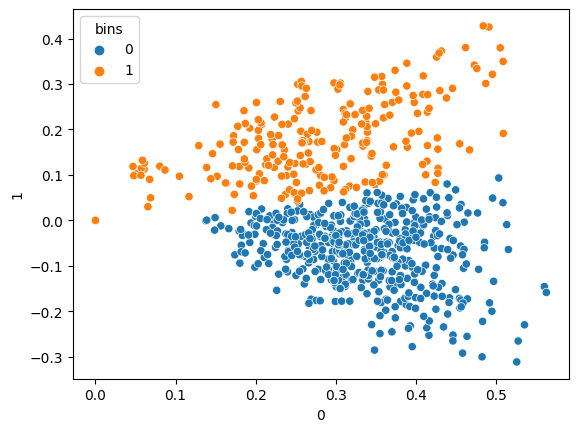

In [52]:
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

In [59]:
X_2d = X_2d.drop('bins',axis=1) 

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs

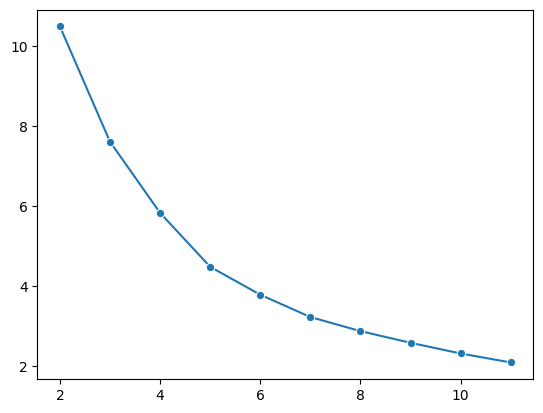

In [60]:
def no_of_clusters(data,min_cluster=2,max_cluster=8):
    wcss = []
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i,random_state=0,init = 'k-means++',verbose=0).fit(data)
        
        wcss.append(km.inertia_)
    ## ploting 
    
    # set_labels(title='Elbow Method',xlabel='No of Clusters',ylabel='WCSS')
    sns.lineplot(x=np.arange(min_cluster,max_cluster),y=wcss,marker='o')

no_of_clusters(data=X_2d,max_cluster=12)

In [65]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.47679488156826944
For n_clusters = 3 The average silhouette_score is : 0.37207281198916886


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.34872320551051234
For n_clusters = 5 The average silhouette_score is : 0.3689018176927733


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.35374697256496923


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.35718117634463353
For n_clusters = 8 The average silhouette_score is : 0.34499271479932553


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.34713127907242547


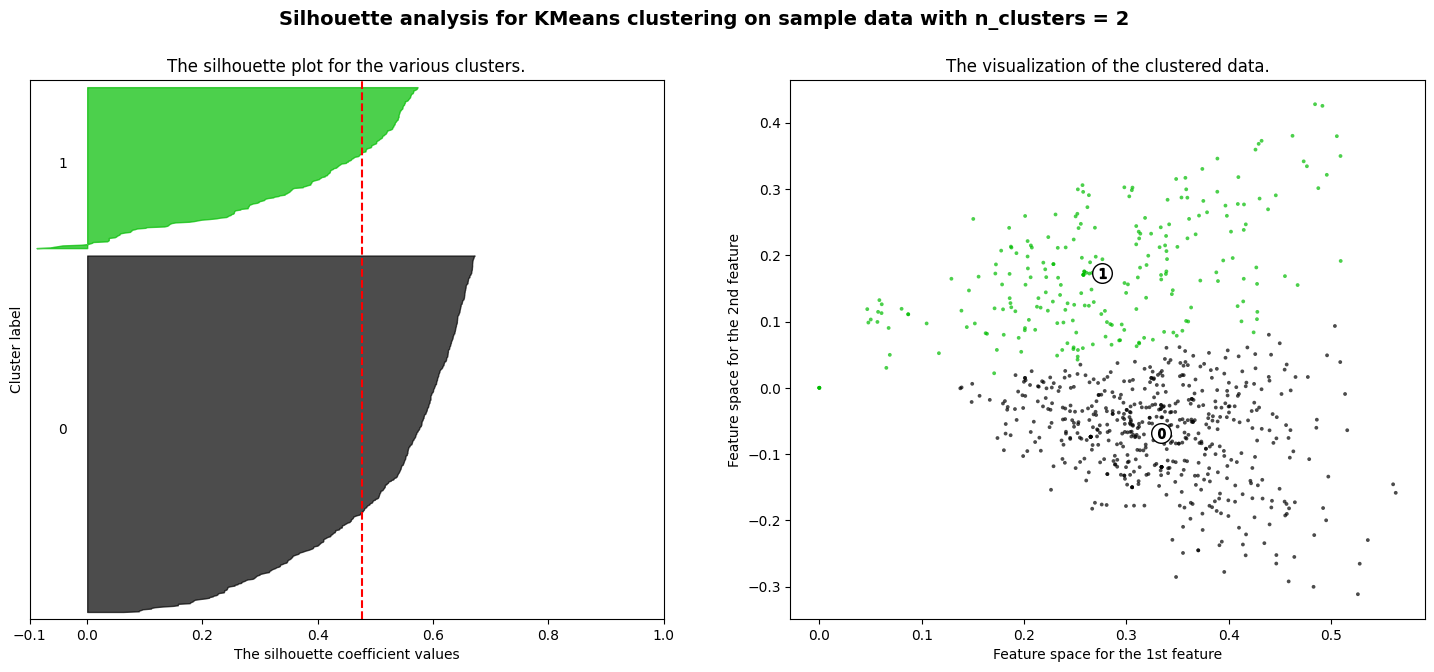

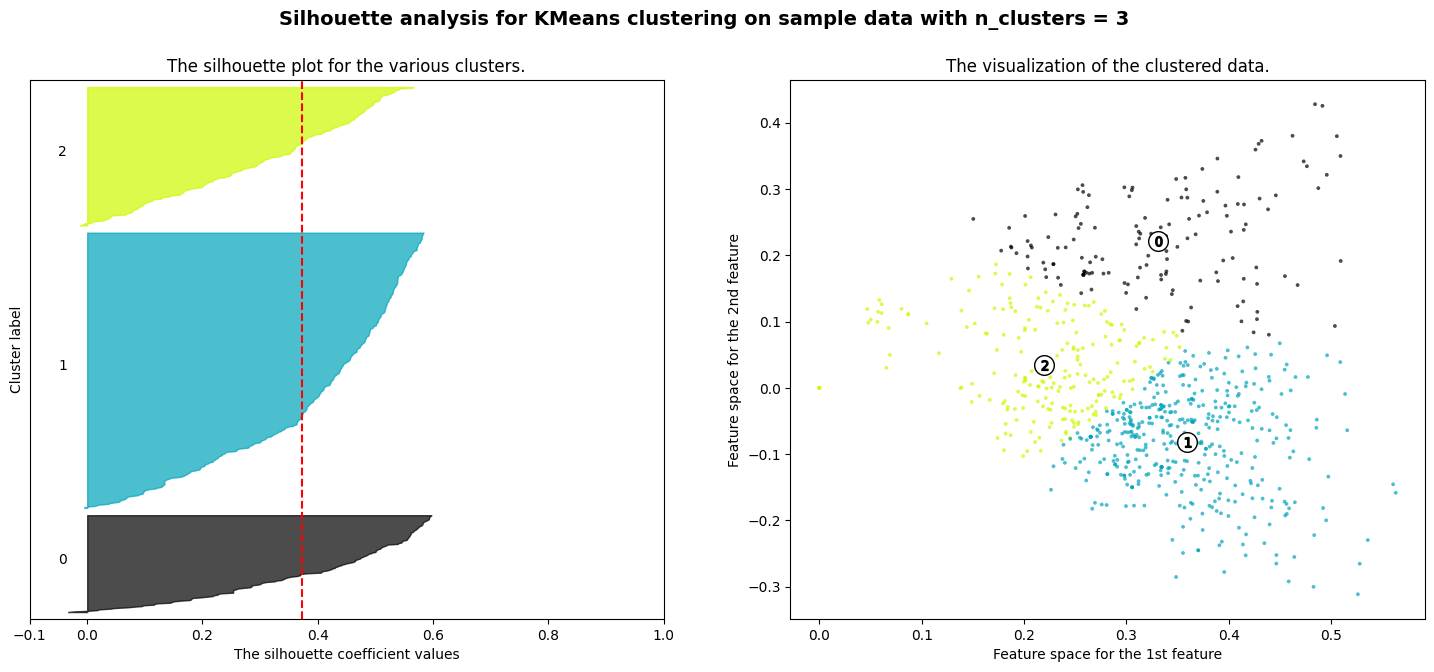

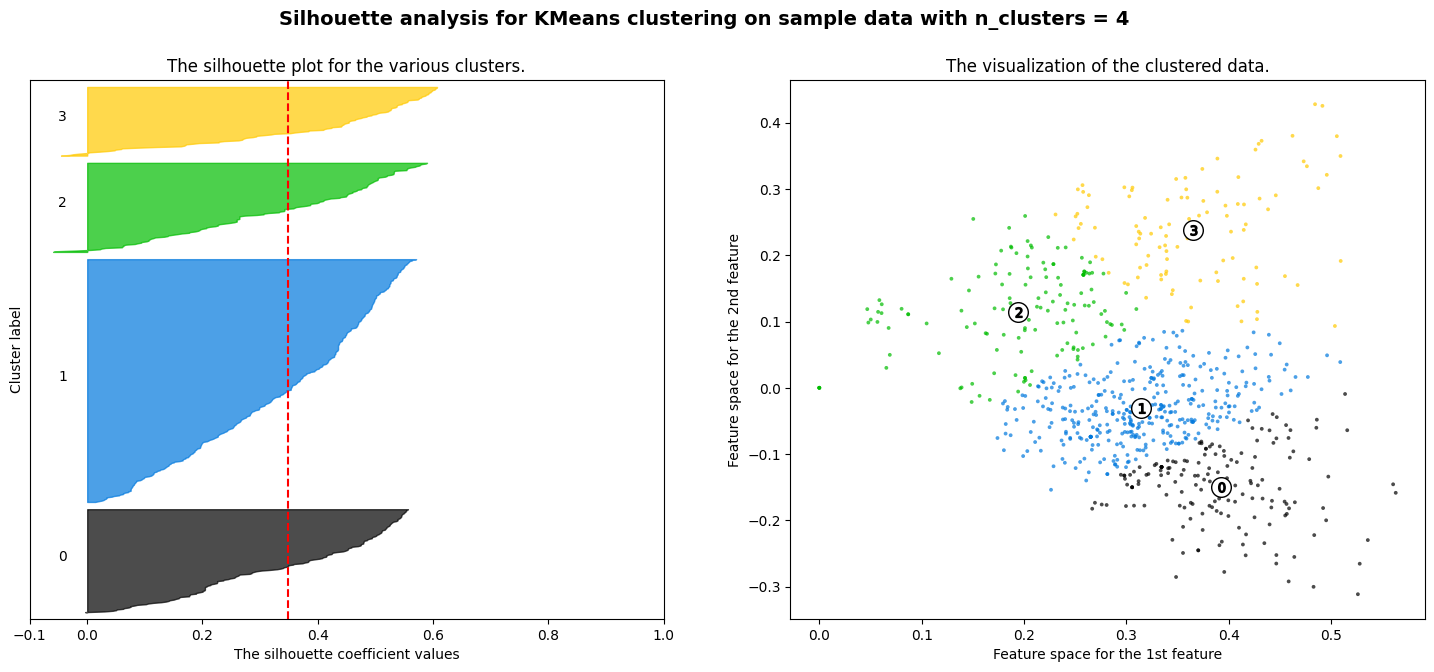

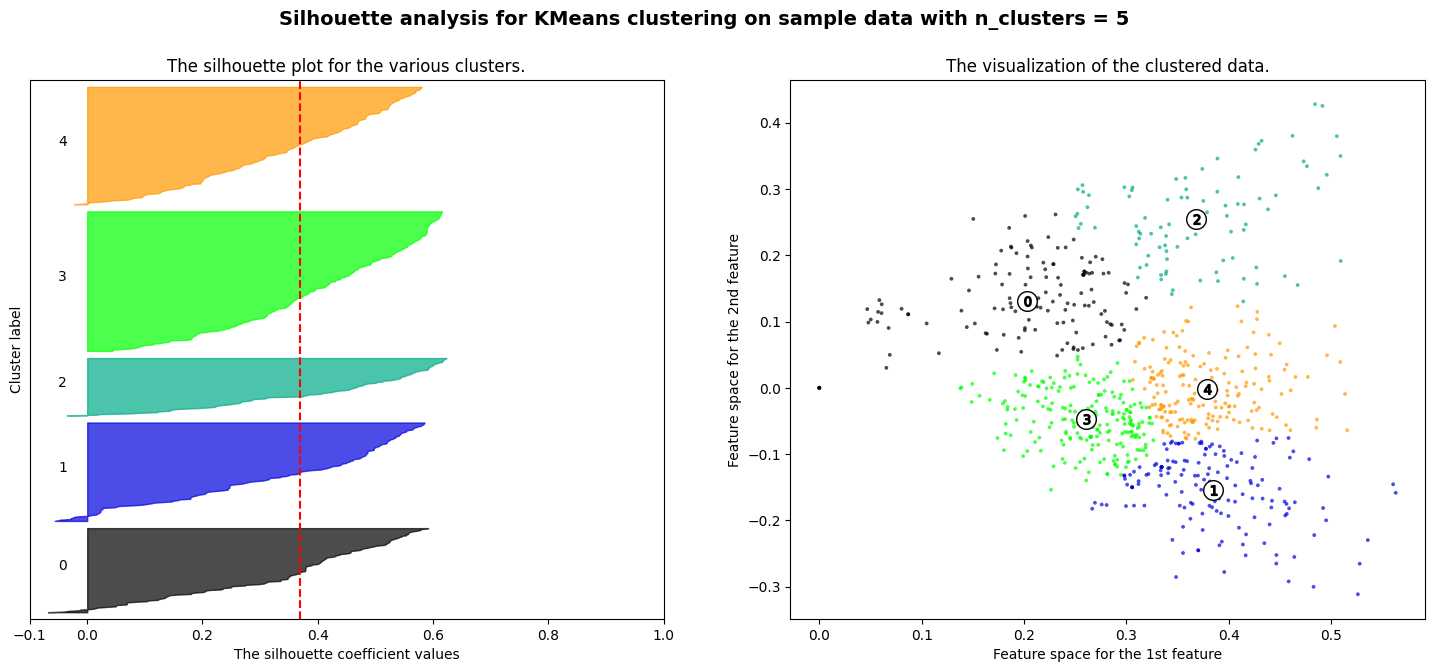

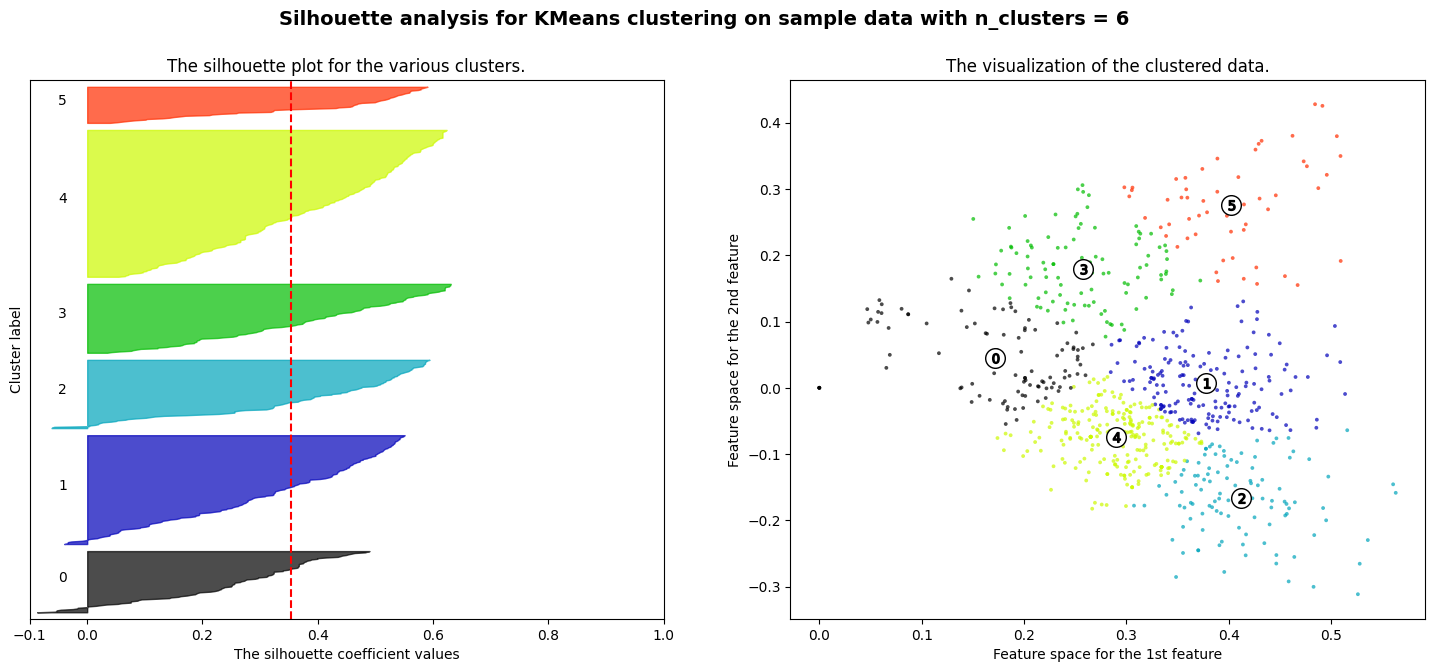

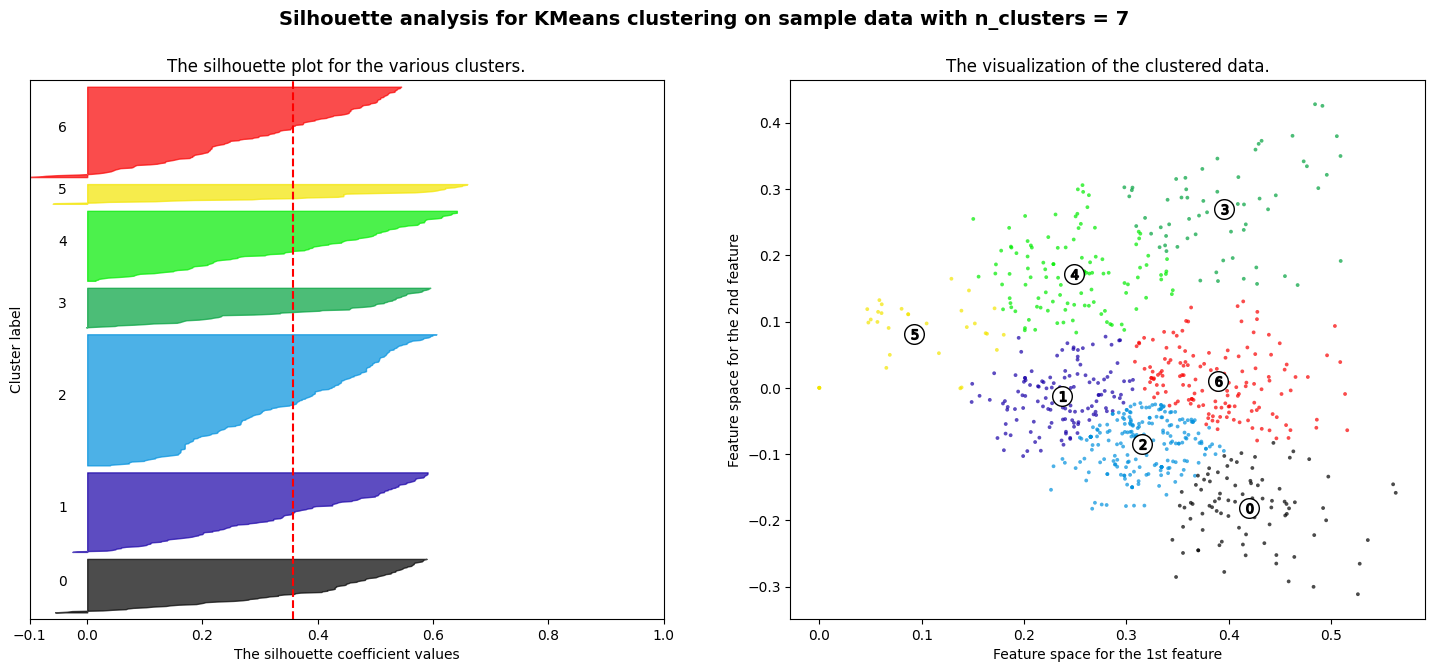

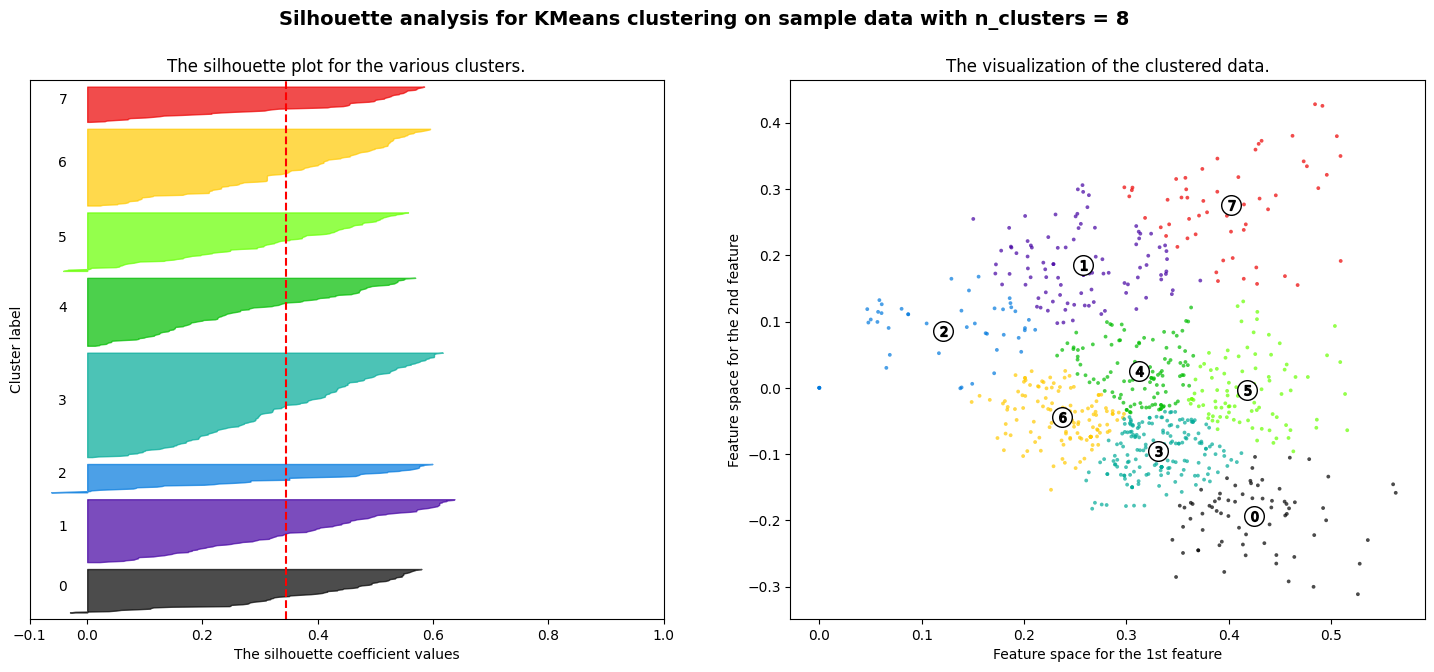

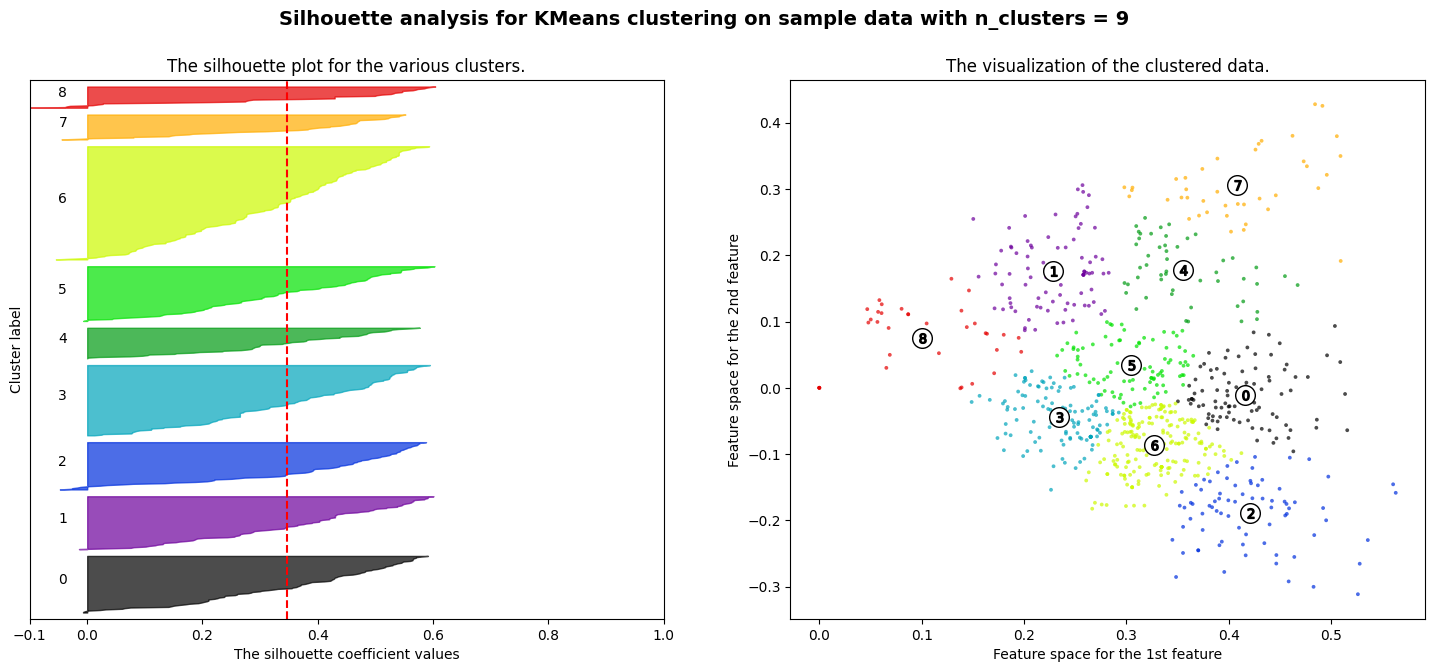

In [66]:
## no of clusters = 5

def silhouette_analysis(range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_2d)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_2d, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_2d, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_2d[0],X_2d[1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_analysis(range_n_clusters)

## Observatiion
- Silhoute score for cluster=2 is `.4767`, cluster=3 is `.3720` with few negative values in the silhoutte coefficiant values.

- For cluster=5 , which we got from elbow method, the silhoutte score of `0.3689` which is comparable to cluster=3 , but than there are negative values in all clusters for silhoutte coefficient, that means overlapping of clusters.

- We will choose cluters=3, as cluster=2 may lead to overfitting for our classification model.


## Final Clusters KMeans

In [73]:
km = KMeans(n_clusters=3,random_state=1)
km.fit(X_2d)

X_2d['bins'] = km.labels_
X['bins'] = km.labels_

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

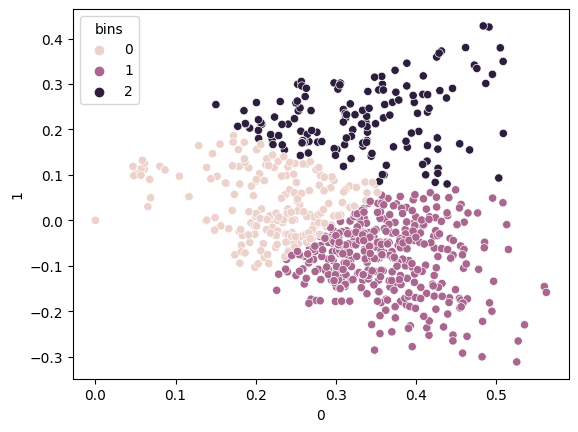

In [75]:
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

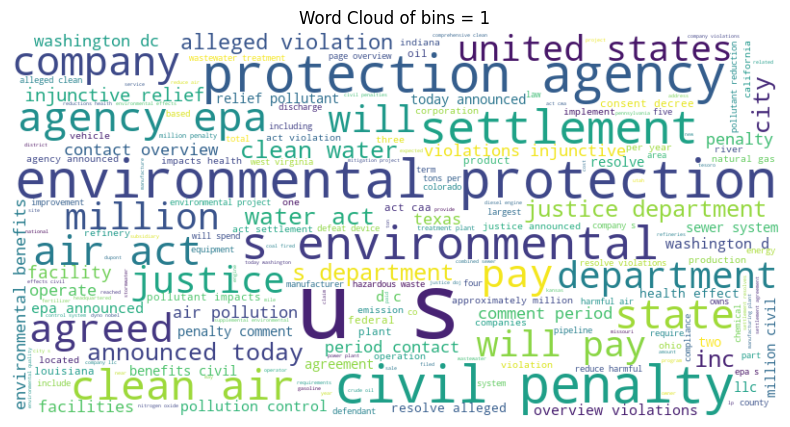

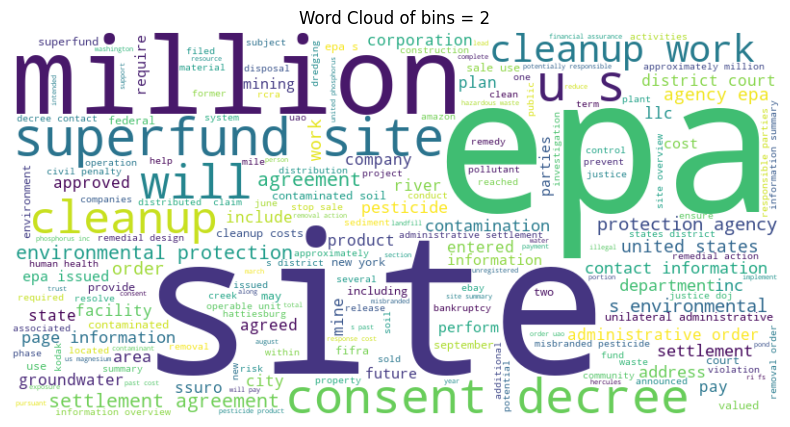

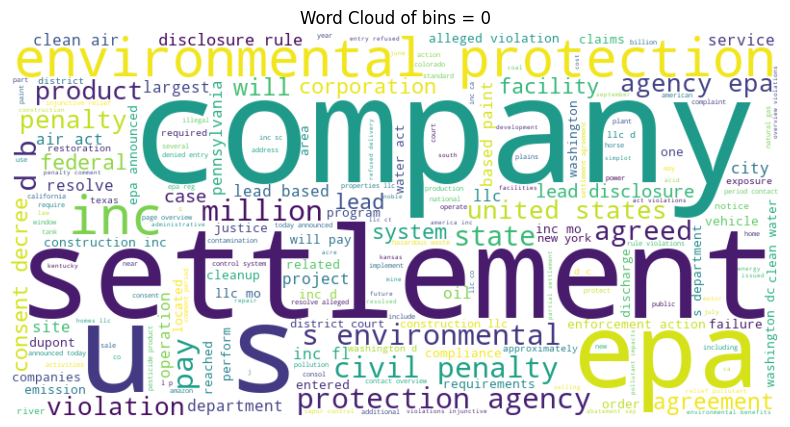

In [84]:
for i in X.bins.unique():
    text = X.query(f"bins=={i}")
    all_text = " ".join(text[0])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of bins = {i}")
    plt.show()